<h1>Proyecto base de datos III</h1>

<h3>ANÁLISIS DE REDES SOCIALES
CENTRALIDAD Y DISPERSIÓN DE INFLUENCIA</h3>

<h3>Integrantes</h3>
<li>Bastian González</li>
<li>Rodrigo Oliva</li>
<li>Jonathan Ríos</li>

<h3>Conexión de archivos de drive</h3>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#imports
import networkx as nx
import matplotlib.pyplot as plt
import random
from scipy.stats import spearmanr
import pandas as pd

<h3>Import y gráfico del dataset</h3>

link de la documentación y descarga del dataset: http://konect.cc/networks/moreno_highschool/

['1 2 1\n', '1 3 2\n', '1 4 2\n', '1 5 1\n', '1 6 1\n']


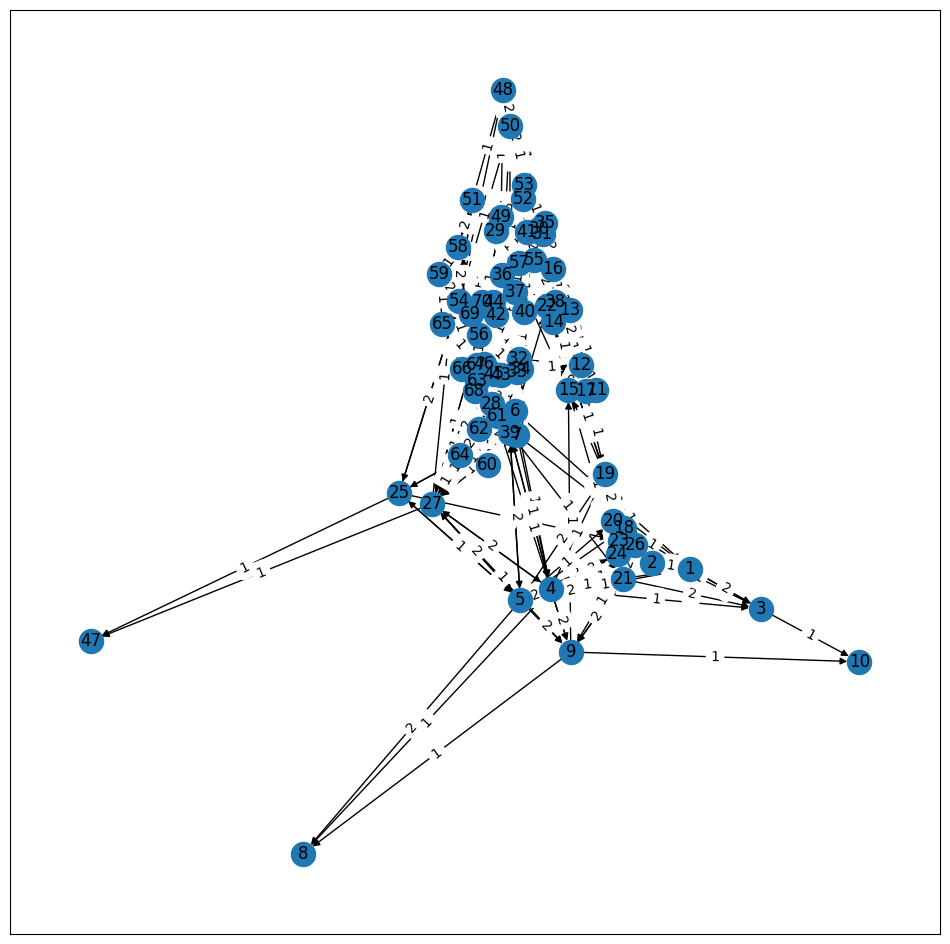

In [ ]:
link= '/content/drive/MyDrive/out.moreno_highschool_highschool.txt'

#función para dibujar grafo

def dibujar_grafo(grafo):
    plt.figure(figsize=(12,12))
    posiciones = nx.spring_layout(grafo)
    etiquetas = nx.get_edge_attributes(grafo, 'weight')
    nx.draw_networkx_nodes(grafo, posiciones)
    nx.draw_networkx_labels(grafo, posiciones)
    nx.draw_networkx_edges(grafo, posiciones)
    nx.draw_networkx_edge_labels(grafo, posiciones, edge_labels=etiquetas)
    plt.show()
#para dibujar nodos infestados
def dibujar_grafo_dest(grafo,node_list):
    highlighted_nodes=node_list
    plt.figure(figsize=(12,12))
    posiciones = nx.spring_layout(grafo)
    etiquetas = nx.get_edge_attributes(grafo, 'weight')
    nx.draw_networkx_nodes(grafo, posiciones)
    nx.draw_networkx_labels(grafo, posiciones)
    nx.draw_networkx_edges(grafo, posiciones)
    nx.draw_networkx_nodes(grafo, posiciones, nodelist=highlighted_nodes,node_color='red')
    plt.show()

#link de la documentación de la base de datos: http://konect.cc/networks/moreno_highschool/

#se abre el archivo deseado
with open(link, 'r') as file:
    lines = file.readlines()

del lines[0]
del lines[0]
#se muestran las primeras 5 lineas
print(lines[:5])

#se inicializa un grafo dirigido
G = nx.DiGraph()

#Se consumen las lineas para armar el grafo en el formaro nodo1 -> nodo2 peso
for line in lines:
  nodo1, nodo2, peso = line.split()
  G.add_edge(nodo2, nodo1, weight=int(peso))

dibujar_grafo(G)

El grafo tiene pesos 1 o 2, donde 1 es considerado amigo y 2 mejor amigo.

# <h3>Depuración del dataset</h3>

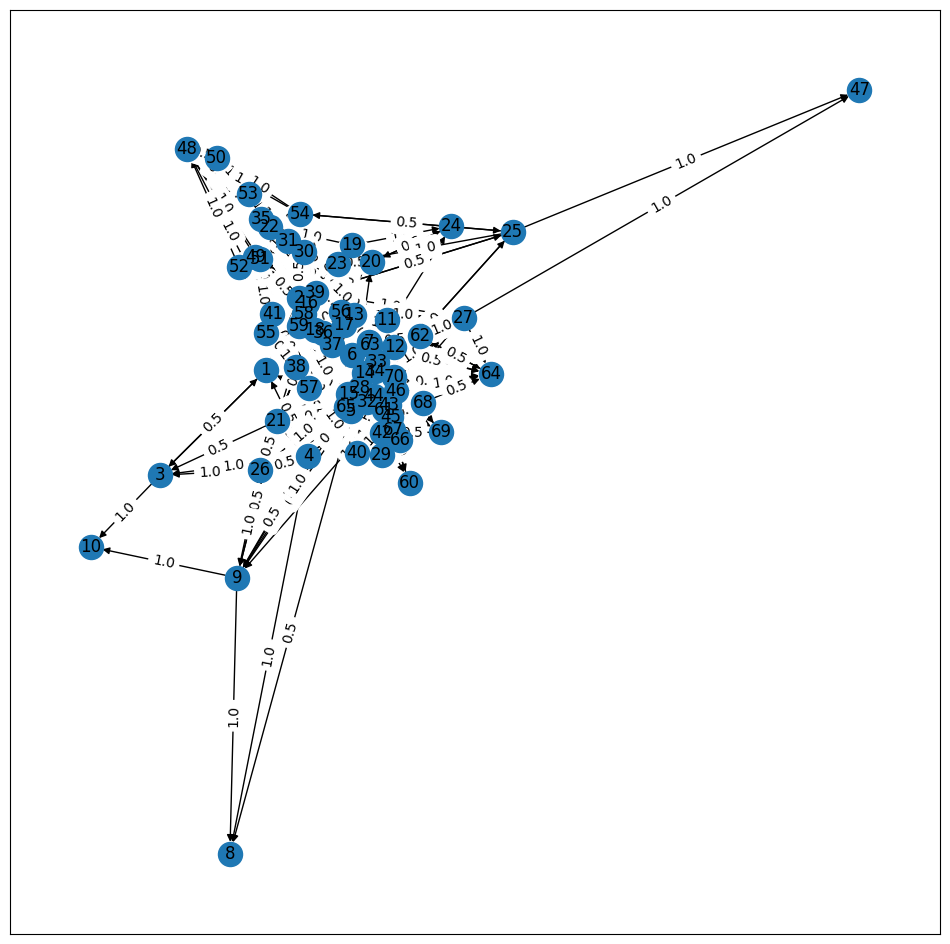

In [ ]:
#considerando que al tener un mayor número de cercanía se interpreta como mayor cercanía, por lo que el peso será = 1/peso original
G2= nx.DiGraph()
for line in lines:
  nodo1, nodo2, peso = line.split()
  G2.add_edge(nodo2, nodo1, weight=(1/int(peso)))
dibujar_grafo(G2)

El grafo tiene pesos 0.5 o 1, donde 1 significa que son amigos y 0.5 mejores amigos. Es decir, mientras mas pequeño el número mas cercanos o amigos son.

# <h3>Cálculo de medidas de grado, cercanía, intermediación y PageRank</h3>

Medidas de grado (In Degrees, Out Degrees)

In [ ]:
# Grado de entrada y salida (para grafos dirigidos)
in_degrees = dict(G2.in_degree())
out_degrees = dict(G2.out_degree())

print("In-degree:")
for node, in_degree in in_degrees.items():
    print(f"Nodo {node}: {in_degree}")

print("\nOut-degree:")
for node, out_degree in out_degrees.items():
    print(f"Nodo {node}: {out_degree}")

In-degree:
Nodo 2: 3
Nodo 1: 6
Nodo 3: 4
Nodo 4: 6
Nodo 5: 5
Nodo 6: 8
Nodo 7: 5
Nodo 8: 3
Nodo 9: 6
Nodo 10: 2
Nodo 12: 8
Nodo 11: 6
Nodo 13: 5
Nodo 14: 3
Nodo 15: 8
Nodo 16: 4
Nodo 17: 3
Nodo 19: 6
Nodo 18: 6
Nodo 20: 5
Nodo 21: 7
Nodo 22: 5
Nodo 23: 4
Nodo 24: 3
Nodo 25: 3
Nodo 26: 3
Nodo 27: 7
Nodo 28: 5
Nodo 29: 2
Nodo 30: 4
Nodo 31: 5
Nodo 32: 5
Nodo 33: 7
Nodo 34: 5
Nodo 35: 5
Nodo 36: 3
Nodo 37: 6
Nodo 38: 6
Nodo 39: 6
Nodo 41: 4
Nodo 40: 12
Nodo 42: 6
Nodo 43: 5
Nodo 44: 6
Nodo 45: 5
Nodo 46: 8
Nodo 47: 2
Nodo 49: 3
Nodo 48: 9
Nodo 50: 8
Nodo 51: 2
Nodo 52: 2
Nodo 53: 6
Nodo 54: 7
Nodo 55: 4
Nodo 56: 9
Nodo 57: 5
Nodo 58: 7
Nodo 59: 7
Nodo 61: 4
Nodo 60: 2
Nodo 63: 8
Nodo 62: 6
Nodo 64: 7
Nodo 65: 6
Nodo 66: 5
Nodo 67: 7
Nodo 68: 6
Nodo 70: 3
Nodo 69: 2

Out-degree:
Nodo 2: 2
Nodo 1: 2
Nodo 3: 2
Nodo 4: 12
Nodo 5: 13
Nodo 6: 9
Nodo 7: 13
Nodo 8: 0
Nodo 9: 4
Nodo 10: 0
Nodo 12: 3
Nodo 11: 3
Nodo 13: 5
Nodo 14: 5
Nodo 15: 6
Nodo 16: 10
Nodo 17: 4
Nodo 19: 6
Nodo 18: 2
Nodo 20: 4

Cercania: un estudiante "a" dice ser amigo del estudiante "b", por lo tanto el nodo b es cercano al nodo a, en base a esta interpretación de cercania se utilizan los siguientes algoritmos.

In [ ]:


cercania_centralidad = nx.closeness_centrality(G, distance='weight')

# se imprimen los grados de cercanía de cada nodo

print("ID nodo   /  Cercania")
for nodo, cercania in cercania_centralidad.items():
    print(f"Nodo {nodo}: {cercania}")

nodo_max_cercania = max(cercania_centralidad, key=cercania_centralidad.get)
max_cercania = cercania_centralidad[nodo_max_cercania]

# Se imprime el nodo y su cercanía centralidad máxima
print(f"Nodo con máxima cercanía centralidad: {nodo_max_cercania}")
print(f"Valor de cercanía/centralidad: {max_cercania}")

ID nodo   /  Cercania
Nodo 2: 0.23209718670076726
Nodo 1: 0.2555888047878895
Nodo 3: 0.23468563116211413
Nodo 4: 0.26864014801110087
Nodo 5: 0.21184709658593523
Nodo 6: 0.21043478260869566
Nodo 7: 0.1907263890713254
Nodo 8: 0.22907736272708715
Nodo 9: 0.2391304347826087
Nodo 10: 0.21122717861848295
Nodo 12: 0.29092366259266683
Nodo 11: 0.2456437151074268
Nodo 13: 0.2222902633190447
Nodo 14: 0.2437468524425046
Nodo 15: 0.2630434782608696
Nodo 16: 0.19305943358595934
Nodo 17: 0.20364656381486676
Nodo 19: 0.2535358826610791
Nodo 18: 0.2555888047878895
Nodo 20: 0.24469160768452985
Nodo 21: 0.2922705314009662
Nodo 22: 0.28695652173913044
Nodo 23: 0.21844441101248685
Nodo 24: 0.23468563116211413
Nodo 25: 0.19605725087766676
Nodo 26: 0.1924708377518558
Nodo 27: 0.24187906046976515
Nodo 28: 0.11647681694208246
Nodo 29: 0.22151029748283754
Nodo 30: 0.18459191456903126
Nodo 31: 0.2721139430284858
Nodo 32: 0.2222902633190447
Nodo 33: 0.22956521739130434
Nodo 34: 0.1890132777922416
Nodo 35: 0.1997

Intermediación (Betweenness)

In [ ]:
# Intermediación (betweenness)
betweenness = nx.betweenness_centrality(G2)
print("\nIntermediación:")
for node, betweenness_value in betweenness.items():
    print(f"Nodo {node}: {betweenness_value}")


Intermediación:
Nodo 2: 0.0028187246016025116
Nodo 1: 0.02491263784001703
Nodo 3: 0.00564853411720419
Nodo 4: 0.08132322894723128
Nodo 5: 0.07907427516892214
Nodo 6: 0.03690903701370433
Nodo 7: 0.04542310864732567
Nodo 8: 0.0
Nodo 9: 0.054649275113418994
Nodo 10: 0.0
Nodo 12: 0.02331391530111636
Nodo 11: 0.0033246664270355207
Nodo 13: 0.021792967381202677
Nodo 14: 0.021091232935862087
Nodo 15: 0.14403612827581955
Nodo 16: 0.08969902959484727
Nodo 17: 0.019596415845911073
Nodo 19: 0.06491321553914102
Nodo 18: 0.07177045797005929
Nodo 20: 0.0485381759585892
Nodo 21: 0.13911633734635437
Nodo 22: 0.09290695568430347
Nodo 23: 0.013212092208255888
Nodo 24: 5.328218243819267e-05
Nodo 25: 0.02238031074739166
Nodo 26: 0.031498949449716714
Nodo 27: 0.11387446796940162
Nodo 28: 0.03878863443772359
Nodo 29: 0.07293183277838011
Nodo 30: 0.017722536296705095
Nodo 31: 0.06883669435725963
Nodo 32: 0.062615443522557
Nodo 33: 0.05498936346141194
Nodo 34: 0.017408484629467452
Nodo 35: 0.0123233916552330

PageRank

In [ ]:
# PageRank
pagerank = nx.pagerank(G2)
print("\nPageRank:")
for node, pagerank_value in pagerank.items():
    print(f"Nodo {node}: {pagerank_value}")


PageRank:
Nodo 2: 0.007891755635560367
Nodo 1: 0.013463973533014179
Nodo 3: 0.013357145182759501
Nodo 4: 0.011137376663246622
Nodo 5: 0.007871552210893928
Nodo 6: 0.007880548629772206
Nodo 7: 0.00783972900604054
Nodo 8: 0.0057168375719308905
Nodo 9: 0.008576925716553286
Nodo 10: 0.011799897098395766
Nodo 12: 0.023130469961506327
Nodo 11: 0.019068641757538137
Nodo 13: 0.009246816141987885
Nodo 14: 0.014627282253405273
Nodo 15: 0.024542389318515507
Nodo 16: 0.007617014718259823
Nodo 17: 0.01199759094215383
Nodo 19: 0.02586939623663917
Nodo 18: 0.029420352113570802
Nodo 20: 0.027552038891210832
Nodo 21: 0.025009773476221884
Nodo 22: 0.022719608823538538
Nodo 23: 0.017552111983342444
Nodo 24: 0.011422722462695626
Nodo 25: 0.005847771222563865
Nodo 26: 0.005994489472239184
Nodo 27: 0.010389723513898788
Nodo 28: 0.004441026194039403
Nodo 29: 0.010110577972185956
Nodo 30: 0.010345026012992366
Nodo 31: 0.019369191482180564
Nodo 32: 0.016221255237093238
Nodo 33: 0.013953894260705682
Nodo 34: 0

# 10 mejores nodos por algoritmo

Primeros 10 lugares In-degree / out-degree:

In [ ]:
in_degrees = dict(G2.in_degree())
out_degrees = dict(G2.out_degree())

# Ordenar los nodos por grados de entrada y salida
sorted_in_degrees = sorted(in_degrees, key=in_degrees.get, reverse=True)
sorted_out_degrees = sorted(out_degrees, key=out_degrees.get, reverse=True)

# Obtener los 10 nodos con los grados más altos de entrada y salida
top_10_in_degrees = sorted_in_degrees[:10]
top_10_out_degrees = sorted_out_degrees[:10]

# Imprimir los 10 nodos con los grados más altos de entrada y salida
print("Top 10 nodos por grados de entrada:")
for node in top_10_in_degrees:
    print(f"Nodo {node}: Grado de entrada {in_degrees[node]}")

print("\nTop 10 nodos por grados de salida:")
for node in top_10_out_degrees:
    print(f"Nodo {node}: Grado de salida {out_degrees[node]}")


Top 10 nodos por grados de entrada:
Nodo 40: Grado de entrada 12
Nodo 48: Grado de entrada 9
Nodo 56: Grado de entrada 9
Nodo 6: Grado de entrada 8
Nodo 12: Grado de entrada 8
Nodo 15: Grado de entrada 8
Nodo 46: Grado de entrada 8
Nodo 50: Grado de entrada 8
Nodo 63: Grado de entrada 8
Nodo 21: Grado de entrada 7

Top 10 nodos por grados de salida:
Nodo 28: Grado de salida 18
Nodo 46: Grado de salida 14
Nodo 5: Grado de salida 13
Nodo 7: Grado de salida 13
Nodo 4: Grado de salida 12
Nodo 27: Grado de salida 11
Nodo 16: Grado de salida 10
Nodo 37: Grado de salida 10
Nodo 6: Grado de salida 9
Nodo 33: Grado de salida 8


Primeros 10 lugares cercanía:

In [ ]:
# Cercanía
cercanias = nx.closeness_centrality(G, distance='weight')
sorted_cercanias = sorted(cercanias, key=cercanias.get, reverse=True)
top_10_cercanias = sorted_cercanias[:10]

print("\nTop 10 nodos por Cercanía:")
for node in top_10_cercanias:
    print(f"Nodo {node}: Cercanía {cercanias[node]}")

nodo_max_cercania = max(cercanias, key=cercanias.get)
max_cercania = cercanias[nodo_max_cercania]


Top 10 nodos por Cercanía:
Nodo 21: Cercanía 0.2922705314009662
Nodo 12: Cercanía 0.29092366259266683
Nodo 50: Cercanía 0.2882668254913639
Nodo 22: Cercanía 0.28695652173913044
Nodo 48: Cercanía 0.28057971014492755
Nodo 31: Cercanía 0.2721139430284858
Nodo 59: Cercanía 0.2709460720283635
Nodo 4: Cercanía 0.26864014801110087
Nodo 15: Cercanía 0.2630434782608696
Nodo 54: Cercanía 0.2619520115460942


Primeros 10 lugares Intermediación

In [ ]:
# Intermediación (betweenness)
betweenness = nx.betweenness_centrality(G2)
sorted_betweenness = sorted(betweenness, key=betweenness.get, reverse=True)
top_10_betweenness = sorted_betweenness[:10]

print("\nTop 10 nodos por Intermediación:")
for node in top_10_betweenness:
    print(f"Nodo {node}: Intermediación {betweenness[node]}")


Top 10 nodos por Intermediación:
Nodo 37: Intermediación 0.2347394032365933
Nodo 57: Intermediación 0.19447551635318044
Nodo 15: Intermediación 0.14403612827581955
Nodo 21: Intermediación 0.13911633734635437
Nodo 27: Intermediación 0.11387446796940162
Nodo 46: Intermediación 0.10004963985900184
Nodo 22: Intermediación 0.09290695568430347
Nodo 16: Intermediación 0.08969902959484727
Nodo 54: Intermediación 0.08550784824210013
Nodo 40: Intermediación 0.08394424023498544


Primeros 10 lugar PageRank

In [ ]:
# PageRank
pagerank = nx.pagerank(G2)
sorted_pagerank = sorted(pagerank, key=pagerank.get, reverse=True)
top_10_pagerank = sorted_pagerank[:10]

print("Top 10 nodos por PageRank:")
for node in top_10_pagerank:
    print(f"Nodo {node}: PageRank {pagerank[node]}")

Top 10 nodos por PageRank:
Nodo 50: PageRank 0.062407709728074016
Nodo 53: PageRank 0.046386402314676896
Nodo 48: PageRank 0.0457620038942328
Nodo 18: PageRank 0.029420352113570802
Nodo 20: PageRank 0.027552038891210832
Nodo 57: PageRank 0.026211520375815856
Nodo 19: PageRank 0.02586939623663917
Nodo 54: PageRank 0.025787594487237546
Nodo 21: PageRank 0.025009773476221884
Nodo 15: PageRank 0.024542389318515507


In [ ]:
# Obtener las medidas de centralidad para cada algoritmo
pagerank = nx.pagerank(G2)
betweenness = nx.betweenness_centrality(G2)
closeness = nx.closeness_centrality(G, distance='weight')
in_degrees = dict(G2.in_degree())
out_degrees = dict(G2.out_degree())

# Ordenar los nodos por las medidas de centralidad de cada algoritmo
sorted_pagerank = sorted(pagerank, key=pagerank.get, reverse=True)
sorted_betweenness = sorted(betweenness, key=betweenness.get, reverse=True)
sorted_closeness = sorted(closeness, key=closeness.get, reverse=True)
sorted_in_degrees = sorted(in_degrees, key=in_degrees.get, reverse=True)
sorted_out_degrees = sorted(out_degrees, key=out_degrees.get, reverse=True)

# Calcular el promedio de las posiciones de los nodos en cada lista
nodes_positions = {}
for i, node in enumerate(sorted_pagerank):
    nodes_positions[node] = nodes_positions.get(node, 0) + i

for i, node in enumerate(sorted_betweenness):
    nodes_positions[node] = nodes_positions.get(node, 0) + i

for i, node in enumerate(sorted_closeness):
    nodes_positions[node] = nodes_positions.get(node, 0) + i

for i, node in enumerate(sorted_in_degrees):
    nodes_positions[node] = nodes_positions.get(node, 0) + i

for i, node in enumerate(sorted_out_degrees):
    nodes_positions[node] = nodes_positions.get(node, 0) + i

# Ordenar los nodos por su posición promediada
sorted_nodes = sorted(nodes_positions, key=nodes_positions.get)

# Obtener los 10 mejores nodos según el promedio de las posiciones
top_10_nodes = sorted_nodes[:10]

print("Los 10 mejores nodos:")
for node in top_10_nodes:
    print(f"Nodo {node} - Posición promedio: {nodes_positions[node] / 5}")  # Dividir por 5, ya que son 5 algoritmos


Los 10 mejores nodos:
Nodo 21 - Posición promedio: 7.4
Nodo 15 - Posición promedio: 9.2
Nodo 54 - Posición promedio: 11.4
Nodo 4 - Posición promedio: 15.2
Nodo 27 - Posición promedio: 15.4
Nodo 56 - Posición promedio: 15.6
Nodo 19 - Posición promedio: 16.0
Nodo 22 - Posición promedio: 17.2
Nodo 31 - Posición promedio: 18.2
Nodo 37 - Posición promedio: 18.2


# <h3>Dispersión de influencia de Linear Threshold model </h3>

In [ ]:
#considerando que no se sabe que tan fácil de convencer es cada estudiante, esto se decidirá al azar con una función random

random.seed(0)

def linear_threshold_model(grafo, umbrales, activacion):
    while True:
        cambios = False
        for nodo in grafo.nodes:
            suma_ponderada = sum(grafo[nodo][vecino]['weight'] * activacion[vecino] for vecino in grafo.neighbors(nodo))
            if suma_ponderada >= umbrales[nodo] and activacion[nodo] == 0:
                activacion[nodo] = 1
                cambios = True

        if not cambios:
            break
    return activacion


# Asignar umbrales a los nodos, este proceso se hace de manera random ya que no hay informacion de que tan fácil de convencer es cada estudiante
umbrales = {}

for nodo in G:
  umbrales[nodo]= random.randint(1, 6)

#crear el array de activacion

#editar el nodo que inicia infectado
def dispersion(grafo, umbral, nodos):
  activacion = {nodo: 0 for nodo in grafo.nodes}
  for node in nodos:
    activacion[node] =1
  lista=[]
  activacion_final= linear_threshold_model(grafo, umbral,activacion)
  for nod in G:
    if activacion_final[nod]== 1:
      lista.append(nod)
  print("nodos infestados al inicio: ",nodos," / N° nodos infestados al final: ",len(lista))
  return lista
#se prueba la dispersión de influencia
nodos=["1","2","3"]
print(dispersion(G, umbrales,nodos))


nodos infestados al inicio:  ['1', '2', '3']  / N° nodos infestados al final:  20
['2', '1', '3', '4', '5', '6', '7', '25', '27', '28', '39', '43', '45', '46', '63', '62', '64', '66', '67', '68']


# dispersión de influencia sobre los top-10 nodos

in degrees

nodos infestados al inicio:  ['40', '48', '56', '6', '12', '15', '46', '50', '63', '21']  / N° nodos infestados al final:  43


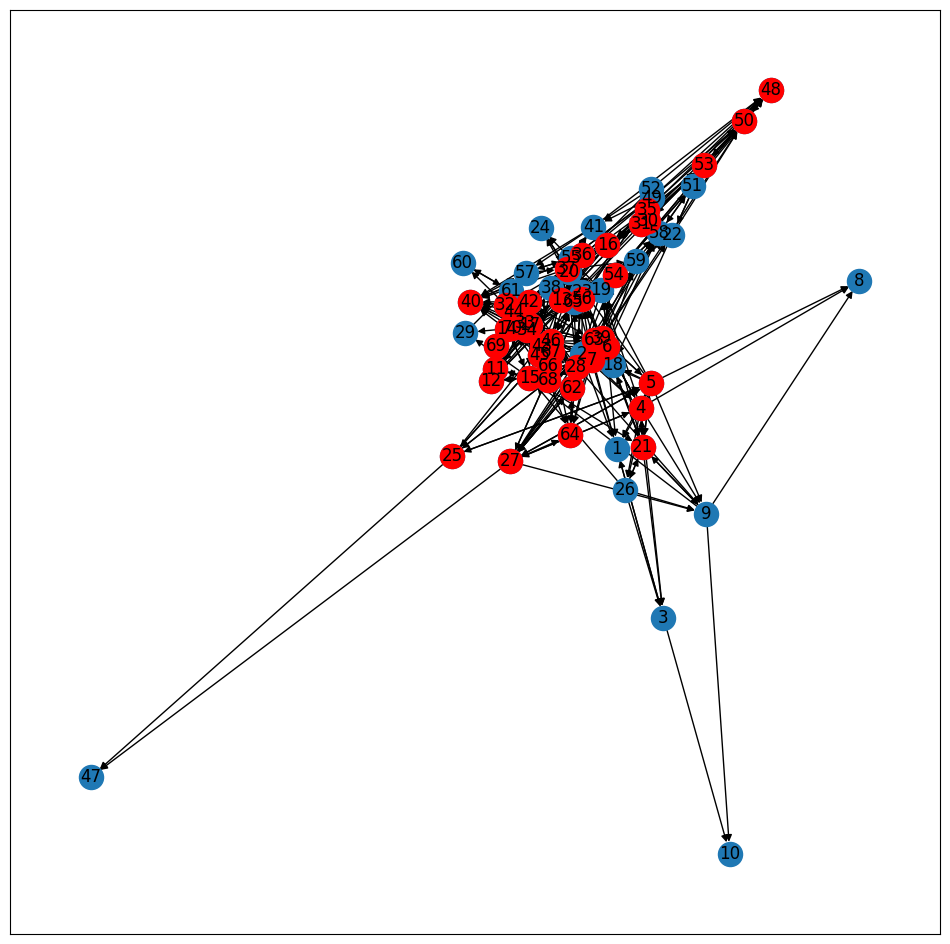

In [ ]:
dispersion_in_degrees = dispersion(G, umbrales,sorted_in_degrees[:10])
dibujar_grafo_dest(G,dispersion_in_degrees)

Out Degrees

nodos infestados al inicio:  ['28', '46', '5', '7', '4', '27', '16', '37', '6', '33']  / N° nodos infestados al final:  25


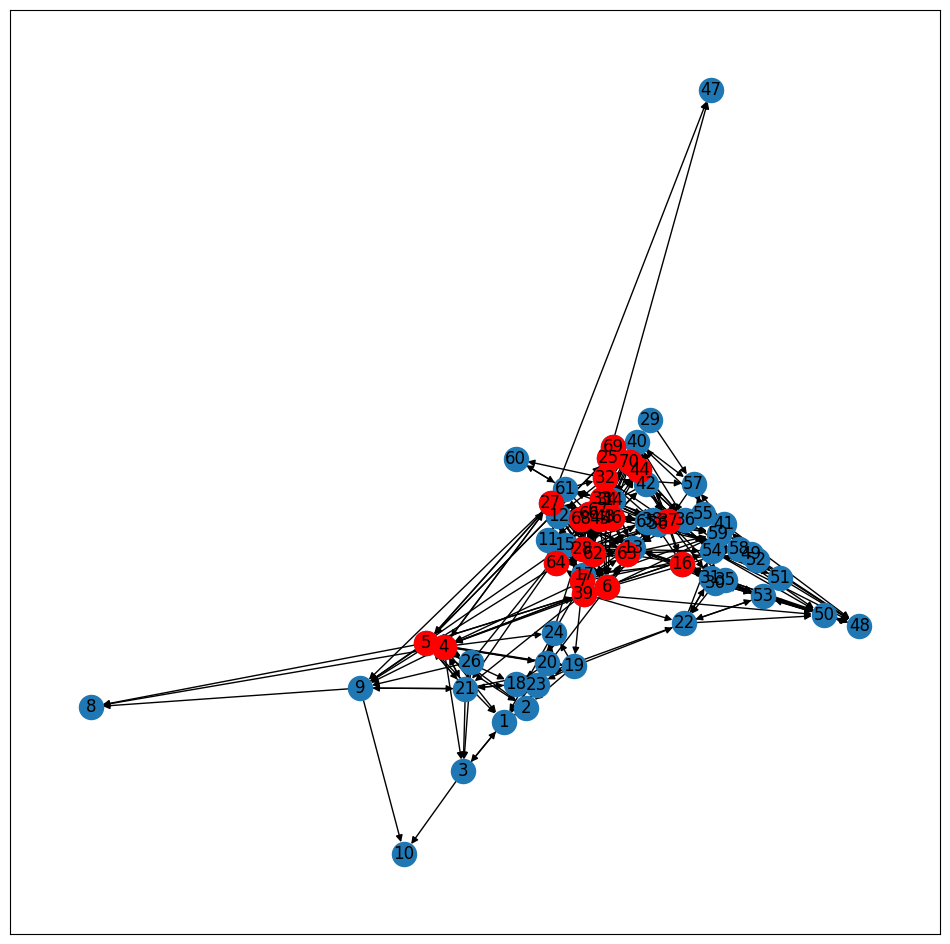

In [ ]:
dispersion_out_degrees = dispersion(G, umbrales,sorted_out_degrees[:10])

dibujar_grafo_dest(G,dispersion_out_degrees)

closeness

nodos infestados al inicio:  ['21', '12', '50', '22', '48', '31', '59', '4', '15', '54']  / N° nodos infestados al final:  44


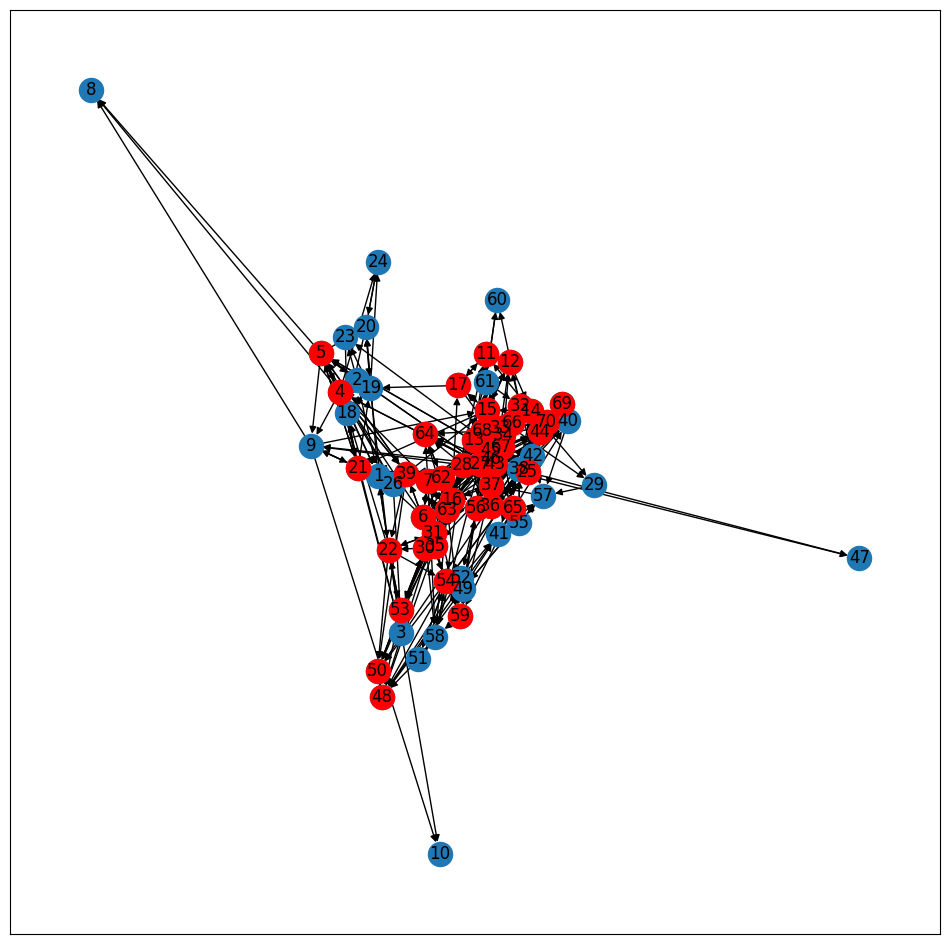

In [ ]:
dispersion_closeness = dispersion(G, umbrales,sorted_closeness[:10])

dibujar_grafo_dest(G,dispersion_closeness)

betweenness

nodos infestados al inicio:  ['37', '57', '15', '21', '27', '46', '22', '16', '54', '40']  / N° nodos infestados al final:  41


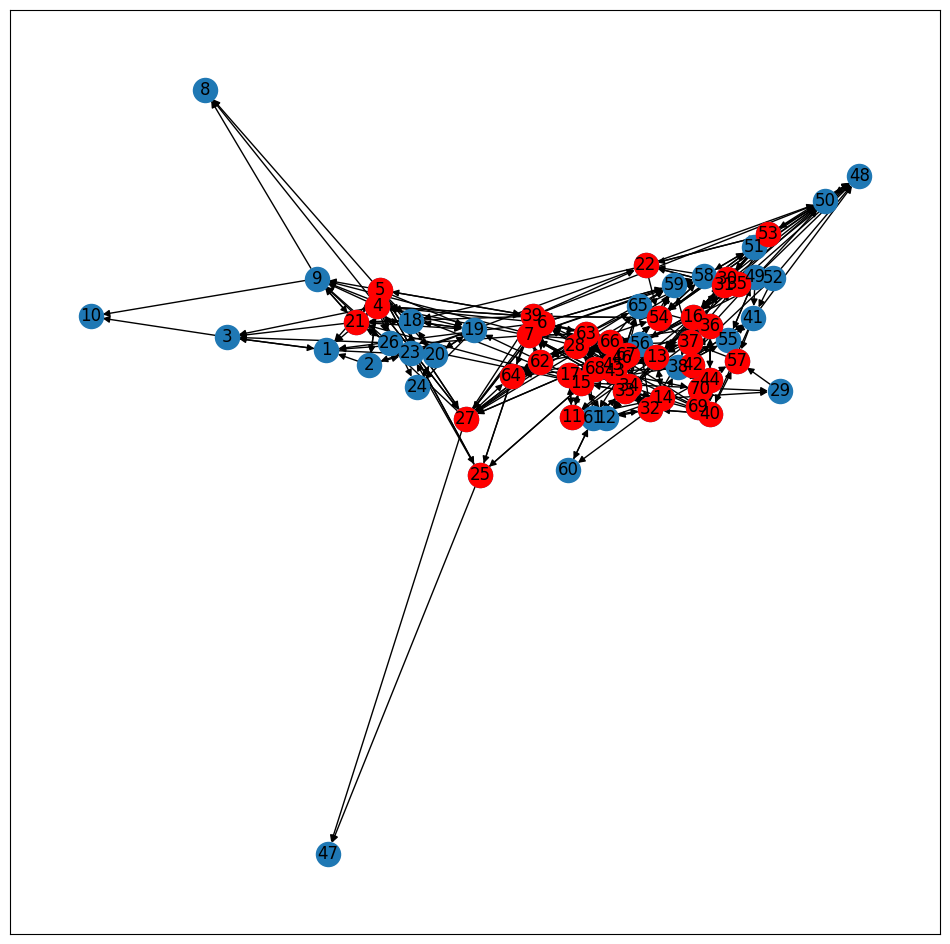

In [ ]:
dispersion_betweenness = dispersion(G, umbrales,sorted_betweenness[:10])
dibujar_grafo_dest(G,dispersion_betweenness)

pagerank

nodos infestados al inicio:  ['50', '53', '48', '18', '20', '57', '19', '54', '21', '15']  / N° nodos infestados al final:  45


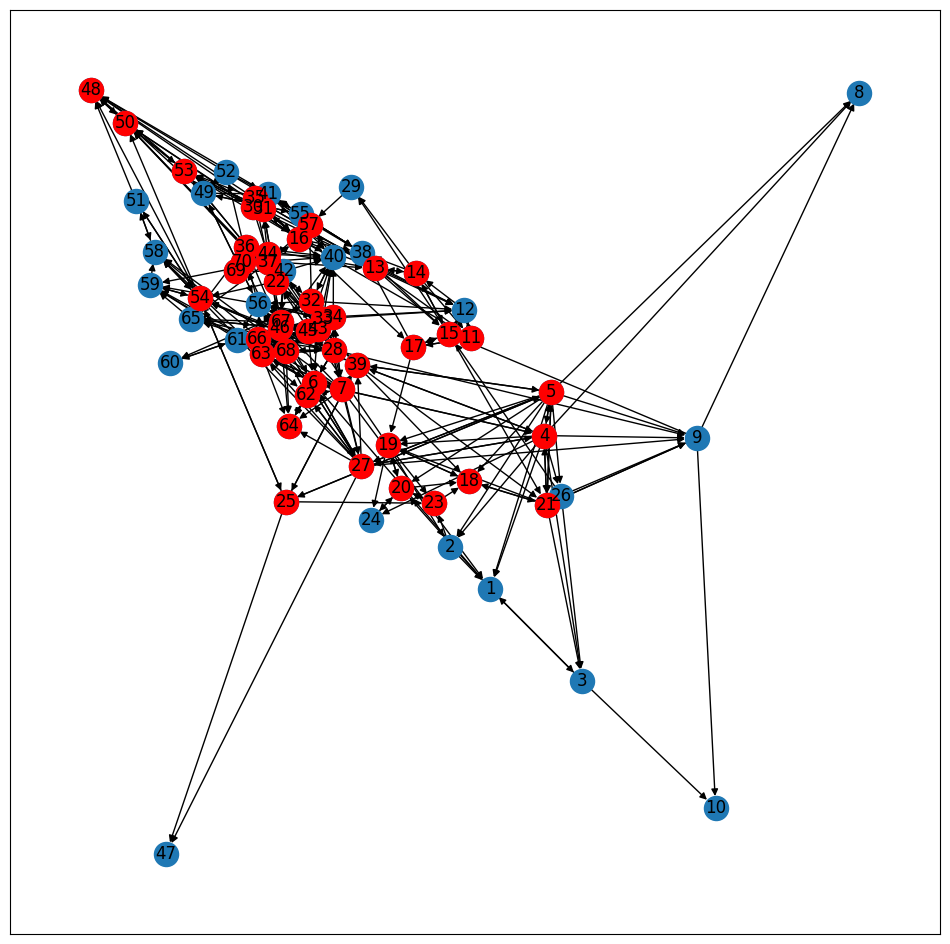

In [ ]:
dispersion_pagerank = dispersion(G, umbrales,sorted_pagerank[:10])
dibujar_grafo_dest(G,dispersion_pagerank)

como conclusión se puede apreciar que con el conjunto de estudiantes seleccionado como los 10 mejores con el criterio de pagerank se logro la mayor cantidad de influenciados/convencidos aplicando la dispersión de influencia Linear Threshold model por lo que queda como mejor criterio en este caso para seleccionar los estudiantes más influyentes de esta red

# **Coeficiente de correlación de Spearman**

In [ ]:
# Calcular las medidas de centralidad para cada nodo
closeness = nx.closeness_centrality(G2)
in_degrees = dict(G2.in_degree())
out_degrees = dict(G2.out_degree())
betweenness = nx.betweenness_centrality(G2)
pagerank = nx.pagerank(G2)


data = {
    'Closeness': pd.Series(closeness),
    'In-degree': pd.Series(in_degrees),
    'Out-degree': pd.Series(out_degrees),
    'Betweenness': pd.Series(betweenness),
    'PageRank': pd.Series(pagerank)
}

df = pd.DataFrame(data)

# Calcular la matriz de correlaciones y los p-values
matriz_correlacion = df.corr(method='spearman')
p_values = df.corr(method=lambda x, y: spearmanr(x, y)[1])

# Filtrar la matriz para mostrar únicamente los valores con p-value < 0.05
correlaciones_significativas = matriz_correlacion.mask(p_values >= 0.05)

print("Matriz de correlaciones:")
#print(correlaciones_significativas)
print(matriz_correlacion)

Matriz de correlaciones:
             Closeness  In-degree  Out-degree  Betweenness  PageRank
Closeness     1.000000   0.430379   -0.153545     0.410120  0.710752
In-degree     0.430379   1.000000    0.276491     0.457081  0.423141
Out-degree   -0.153545   0.276491    1.000000     0.461236 -0.187410
Betweenness   0.410120   0.457081    0.461236     1.000000  0.429659
PageRank      0.710752   0.423141   -0.187410     0.429659  1.000000


<h1>punto 6</h3>
Como conclusión del punto 4, se puede apreciar que con el conjunto de estudiantes seleccionado como los 10 mejores con el criterio de pagerank, se logró la mayor cantidad de influenciados/convencidos aplicando la dispersión de influencia Linear Threshold model, por lo que queda como mejor criterio en este caso para seleccionar los nodos más influyentes de esta red.

 La matriz de correlaciones muestra las relaciones de correlación entre las diferentes medidas de centralidad que has calculado para tus nodos en el grafo G2.

El coeficiente de correlación de Spearman varía entre -1 y 1:

1 (correlación positiva perfecta): Indica una relación positiva perfecta entre las variables. Es decir que a medida que una variable aumenta, la otra también lo hace de manera constante.

0 (correlación nula): Indica que no hay relación entre las variables.

-1 (correlación negativa perfecta): Indica una relación negativa perfecta entre las variables. En este caso, a medida que una variable aumenta, la otra disminuye.

Valores diagonal NaN: Los valores en la diagonal principal (de la esquina superior izquierda a la inferior derecha) muestran la correlación entre la misma medida de centralidad. Por ejemplo, la correlación entre la cercanía de un nodo y su propia cercanía es siempre 1 (ya que un nodo está perfectamente correlacionado consigo mismo).

Valores fuera de la diagonal principal: Los valores fuera de la diagonal principal indican la correlación entre dos medidas diferentes de centralidad para los nodos. Por ejemplo, hay una correlación positiva moderada entre la cercanía y el in-degree (0.43) y entre la cercanía y la intermediación (0.41). La correlación entre in-degree y betweenness es relativamente alta (0.46), al igual que entre out-degree y betweenness o intermediación.

Valores NaN fuera de la diagonal principal: Los valores NaN indican que el P-values es menor a o igual 0.05, esto debido a que no se muestra una relacion significativa en las muestras de cercanía.